In [ ]:
'''
 * Copyright (c) 2008 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

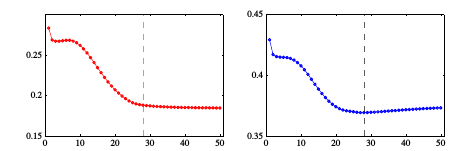

Fig.12 An illustration of the behaviour of training set error (left) and validation set error (right) during a typical training session, as a function of the iteration step, for the sinusoidal data set. The goal of achieving the best generalization performance suggests that training should be stopped at the point shown by the vertical dashed lines, corresponding to the minimum of the validation set error.



##  Early Stopping

An alternative to regularization as a way of controlling the effective complexity of a network is the procedure of **early stopping**. The training of nonlinear network models corresponds to an iterative reduction of the error function defined with respect to a set of training data. For many of the optimization algorithms used for network training, such as conjugate gradients, the error is a nonincreasing function of the iteration index. However, the error measured with respect to independent data, generally called a **validation set**, often shows a decrease at first, followed by an increase as the network starts to overfit.

Training can therefore be stopped at the point of smallest error with respect to the validation data set, as indicated in Figure 5.12, in order to obtain a network having good generalization performance. The behaviour of the network in this case is sometimes explained qualitatively in terms of the effective number of degrees of freedom in the network. This number starts out small and then grows during the training process, corresponding to a steady increase in the effective complexity of the model. Halting training before this growth becomes too large corresponds to limiting the effective complexity of the model.

### Visualizing Early Stopping

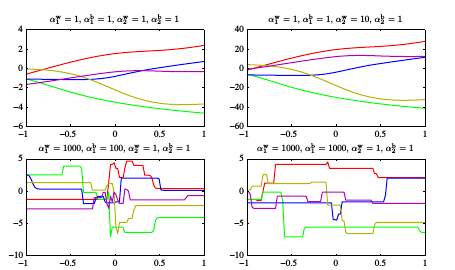


Fig.11 Illustration of the effect of the hyperparameters governing the prior distribution over weights and biases in a two-layer network having a single input, a single linear output, and 12 hidden units having ‘tanh’ activation functions. The priors are governed by four hyperparameters $α_1^b$ , $α_1^w$ , $α_2^b$ , and $α_2^w$ , which represent the precisions of the Gaussian distributions of the ﬁrst-layer biases, ﬁrst-layer weights, second-layer biases, and second-layer weights, respectively. We see that the parameter α2w governs the vertical scale of functions (note the different vertical axis ranges on the top two diagrams),$α_1^w$ governs the horizontal scale of variations in the function values, and $α_1^b$ governs the horizontal range over which variations occur. The parameter $α_2^b$ , whose effect is not illustrated here, governs the range of vertical offsets of the functions.

Fig.11 illustrates the effect of the hyperparameters governing the prior distribution over weights and biases in a two-layer network having a single input, a single linear output, and 12 hidden units with 'tanh' activation functions. The priors are governed by four hyperparameters:

- $ \alpha_{1b} $: Precision of the first-layer biases.
- $ \alpha_{1w} $: Precision of the first-layer weights.
- $ \alpha_{2b} $: Precision of the second-layer biases.
- $ \alpha_{2w} $: Precision of the second-layer weights.

The plots show that the parameter $ \alpha_{2w} $ governs the vertical scale of the function, $ \alpha_{1w} $ governs the horizontal scale of variations, and $ \alpha_{1b} $ governs the horizontal range over which variations occur. The parameter $ \alpha_{2b} $ governs the range of vertical offsets.

### Early Stopping and Regularization

In the case of a quadratic error function, we can verify the insight that early stopping should exhibit similar behaviour to regularization using a simple weight-decay term. This can be understood from the illustration in Figure 5.13, where the axes in weight space are rotated to be parallel to the eigenvectors of the Hessian matrix. 

If, in the absence of weight decay, the weight vector starts at the origin and proceeds during training along a path that follows the local negative gradient vector, then the weight vector will move initially parallel to the $ w_2 $ axis, through a point corresponding roughly to $ w^* $, and then move towards the minimum of the error function $ w_{ML} $. This follows from the shape of the error surface and the widely differing eigenvalues of the Hessian. Stopping at a point near $ w^* $ is therefore similar to weight decay.

### Relationship Between Early Stopping and Regularization

The relationship between early stopping and weight decay can be made quantitative, thereby showing that the quantity $ \tau \eta $ (where $ \tau $ is the iteration index, and $ \eta $ is the learning rate parameter) plays the role of the reciprocal of the regularization parameter $ \lambda $. The effective number of parameters in the network grows during the course of training, suggesting that early stopping controls the complexity by halting the increase of effective parameters.

---

### Exercise 5.25

**Question:** Describe the relationship between early stopping and weight decay mathematically. How does the early stopping iteration correlate with regularization in terms of weight decay?


In [5]:
import numpy as np

# Activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

# Loss Function (Mean Squared Error)
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Initialize network architecture
n_features = 5  # Number of features in the input
n_hidden = 10  # Number of neurons in hidden layer
n_output = 1  # Single output (for simplicity, can be modified)

# Example dataset (100 samples with 5 features each)
X = np.random.randn(100, n_features)  # Input features (100 samples)
T = np.random.randn(100, n_output)  # Target values (100 samples)

# Train/Validation Split (80% training, 20% validation)
train_size = int(0.8 * X.shape[0])  # 80% for training
X_train, X_val = X[:train_size], X[train_size:]  # Split into training and validation
T_train, T_val = T[:train_size], T[train_size:]  # Same for targets

# Add bias term (column of ones) to the training and validation data
X_train = np.hstack([np.ones((X_train.shape[0], 1)), X_train])  # Add bias to input
X_val = np.hstack([np.ones((X_val.shape[0], 1)), X_val])  # Add bias to input

# Initialize weights for a 2-layer neural network with bias terms
weights1 = np.random.randn(n_hidden, n_features + 1) * 0.01  # Including bias
weights2 = np.random.randn(n_output, n_hidden + 1) * 0.01  # Including bias

# Hyperparameters
learning_rate = 0.01
epochs = 1000
patience = 10  # Early stopping patience
min_delta = 0.001  # Minimum change in validation error to qualify as improvement

# Training loop with Early Stopping
def train_neural_network(X_train, T_train, X_val, T_val, weights1, weights2, learning_rate, epochs, patience, min_delta):
    best_val_error = float('inf')
    epochs_without_improvement = 0  # Counter to track early stopping
    best_weights1, best_weights2 = weights1.copy(), weights2.copy()

    for epoch in range(epochs):
        # Forward pass (Training)
        z_hidden = np.dot(X_train, weights1.T)  # Input to hidden layer
        a_hidden = sigmoid(z_hidden)  # Hidden layer output
        a_hidden = np.hstack([np.ones((a_hidden.shape[0], 1)), a_hidden])  # Add bias term to hidden layer output
        y_output = np.dot(a_hidden, weights2.T)  # Output layer

        # Compute training error (Loss)
        train_error = mean_squared_error(T_train, y_output)
        
        # Backpropagation (Gradient Computation)
        delta_output = y_output - T_train  # Error at output
        grad_w2 = np.dot(delta_output.T, a_hidden)  # Gradient w.r.t. weights2
        delta_hidden = np.dot(delta_output, weights2[:, 1:]) * sigmoid_derivative(z_hidden)  # Backpropagate to hidden layer
        grad_w1 = np.dot(delta_hidden.T, X_train)  # Gradient w.r.t. weights1

        # Ensure grad_w1 has the correct shape (n_hidden, n_features + 1)
        grad_w1 = grad_w1  # This is the correct shape for grad_w1

        # Update weights (Gradient Descent)
        weights1 -= learning_rate * grad_w1
        weights2 -= learning_rate * grad_w2

        # Validation step (for early stopping)
        z_hidden_val = np.dot(X_val, weights1.T)
        a_hidden_val = sigmoid(z_hidden_val)
        a_hidden_val = np.hstack([np.ones((a_hidden_val.shape[0], 1)), a_hidden_val])
        y_output_val = np.dot(a_hidden_val, weights2.T)
        val_error = mean_squared_error(T_val, y_output_val)

        # Early stopping check
        if val_error < best_val_error - min_delta:
            best_val_error = val_error
            best_weights1, best_weights2 = weights1.copy(), weights2.copy()
            epochs_without_improvement = 0  # Reset counter if validation error improved
        else:
            epochs_without_improvement += 1

        if epochs_without_improvement >= patience:
            print(f"Early stopping triggered at epoch {epoch+1}")
            break

        if epoch % 100 == 0:  # Print progress every 100 epochs
            print(f"Epoch {epoch+1}/{epochs}, Training Error: {train_error}, Validation Error: {val_error}")

    # Return the best weights found during training
    return best_weights1, best_weights2

# Train the model with early stopping
weights1, weights2 = train_neural_network(X_train, T_train, X_val, T_val, weights1, weights2, learning_rate, epochs, patience, min_delta)


Epoch 1/1000, Training Error: 0.792694967657274, Validation Error: 1.048789889420754
Early stopping triggered at epoch 21


In [6]:
import random
import math

# Activation function and its derivative
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

# Loss Function (Mean Squared Error)
def mean_squared_error(y_true, y_pred):
    total_error = 0
    for i in range(len(y_true)):
        total_error += (y_true[i] - y_pred[i]) ** 2
    return total_error / len(y_true)

# Initialize network architecture
n_features = 5  # Number of features in the input
n_hidden = 10  # Number of neurons in hidden layer
n_output = 1  # Single output (for simplicity)

# Example dataset (100 samples with 5 features each)
X = [[random.gauss(0, 1) for _ in range(n_features)] for _ in range(100)]
T = [[random.gauss(0, 1)] for _ in range(100)]

# Train/Validation Split (80% training, 20% validation)
train_size = int(0.8 * len(X))  # 80% for training
X_train, X_val = X[:train_size], X[train_size:]  # Split into training and validation
T_train, T_val = T[:train_size], T[train_size:]  # Same for targets

# Add bias term (column of ones) to the training and validation data
for i in range(len(X_train)):
    X_train[i] = [1] + X_train[i]  # Add bias to input

for i in range(len(X_val)):
    X_val[i] = [1] + X_val[i]  # Add bias to input

# Initialize weights for a 2-layer neural network with bias terms
weights1 = [[random.gauss(0, 0.01) for _ in range(n_features + 1)] for _ in range(n_hidden)]
weights2 = [[random.gauss(0, 0.01) for _ in range(n_hidden + 1)] for _ in range(n_output)]

# Hyperparameters
learning_rate = 0.01
epochs = 1000
patience = 10  # Early stopping patience
min_delta = 0.001  # Minimum change in validation error to qualify as improvement

# Training loop with Early Stopping
def train_neural_network(X_train, T_train, X_val, T_val, weights1, weights2, learning_rate, epochs, patience, min_delta):
    best_val_error = float('inf')
    epochs_without_improvement = 0  # Counter to track early stopping
    best_weights1, best_weights2 = weights1, weights2

    for epoch in range(epochs):
        # Forward pass (Training)
        z_hidden = [[0 for _ in range(n_hidden)] for _ in range(len(X_train))]
        for i in range(len(X_train)):
            for j in range(n_hidden):
                z_hidden[i][j] = sum(X_train[i][k] * weights1[j][k] for k in range(n_features + 1))

        a_hidden = [[sigmoid(z) for z in row] for row in z_hidden]

        # Add bias term to hidden layer output
        a_hidden_with_bias = [[1] + row for row in a_hidden]

        # Output layer
        y_output = [0] * len(X_train)
        for i in range(len(X_train)):
            y_output[i] = sum(a_hidden_with_bias[i][j] * weights2[0][j] for j in range(n_hidden + 1))

        # Compute training error (Loss)
        train_error = mean_squared_error([t[0] for t in T_train], y_output)
        
        # Backpropagation (Gradient Computation)
        delta_output = [y_output[i] - T_train[i][0] for i in range(len(y_output))]

        grad_w2 = [[0 for _ in range(n_hidden + 1)] for _ in range(n_output)]
        for i in range(n_output):
            for j in range(n_hidden + 1):
                grad_w2[i][j] = sum(delta_output[k] * a_hidden_with_bias[k][j] for k in range(len(X_train)))

        delta_hidden = [[0 for _ in range(n_hidden)] for _ in range(len(X_train))]
        for i in range(len(X_train)):
            for j in range(n_hidden):
                delta_hidden[i][j] = sum(delta_output[i] * weights2[0][j+1] for i in range(len(X_train))) * sigmoid_derivative(z_hidden[i][j])

        grad_w1 = [[0 for _ in range(n_features + 1)] for _ in range(n_hidden)]
        for j in range(n_hidden):
            for k in range(n_features + 1):
                grad_w1[j][k] = sum(delta_hidden[i][j] * X_train[i][k] for i in range(len(X_train)))

        # Update weights (Gradient Descent)
        for i in range(n_hidden):
            for j in range(n_features + 1):
                weights1[i][j] -= learning_rate * grad_w1[i][j]

        for i in range(n_output):
            for j in range(n_hidden + 1):
                weights2[i][j] -= learning_rate * grad_w2[i][j]

        # Validation step (for early stopping)
        z_hidden_val = [[0 for _ in range(n_hidden)] for _ in range(len(X_val))]
        for i in range(len(X_val)):
            for j in range(n_hidden):
                z_hidden_val[i][j] = sum(X_val[i][k] * weights1[j][k] for k in range(n_features + 1))

        a_hidden_val = [[sigmoid(z) for z in row] for row in z_hidden_val]
        a_hidden_val_with_bias = [[1] + row for row in a_hidden_val]

        y_output_val = [0] * len(X_val)
        for i in range(len(X_val)):
            y_output_val[i] = sum(a_hidden_val_with_bias[i][j] * weights2[0][j] for j in range(n_hidden + 1))

        val_error = mean_squared_error([t[0] for t in T_val], y_output_val)

        # Early stopping check
        if val_error < best_val_error - min_delta:
            best_val_error = val_error
            best_weights1, best_weights2 = weights1, weights2
            epochs_without_improvement = 0  # Reset counter if validation error improved
        else:
            epochs_without_improvement += 1

        if epochs_without_improvement >= patience:
            print(f"Early stopping triggered at epoch {epoch+1}")
            break

        if epoch % 100 == 0:  # Print progress every 100 epochs
            print(f"Epoch {epoch+1}/{epochs}, Training Error: {train_error}, Validation Error: {val_error}")

    # Return the best weights found during training
    return best_weights1, best_weights2

# Train the model with early stopping
weights1, weights2 = train_neural_network(X_train, T_train, X_val, T_val, weights1, weights2, learning_rate, epochs, patience, min_delta)


Epoch 1/1000, Training Error: 1.0118206869462256, Validation Error: 0.8816763397121641
Early stopping triggered at epoch 57


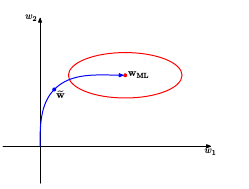

Fig.13 A schematic illustration of why early stopping can give similar results to weight decay in the case of a quadratic error function. The ellipse shows a contour of constant error, and wML denotes the minimum of the error function. If the weight vector starts at the origin and moves according to the local negative gradient direction, then it will follow the path shown by the curve. By stopping training early, a weight vector $ \tilde w $ is found that is qualitatively similar to that obtained with a simple weight-decay reg- ularizer and training to the minimum of the regularized error

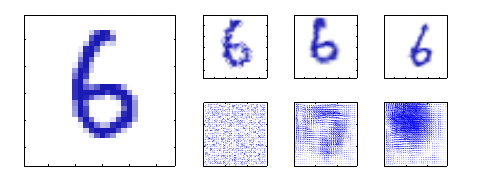

Fig.14 Illustration of the synthetic warping of a handwritten digit. The original image is shown on the left. On the right, the top row shows three examples of warped digits, with the corresponding displacement ﬁelds shown on the bottom row. These displacement ﬁelds are generated by sampling random displacements ∆x, ∆y ∈ (0, 1) at each pixel and then smoothing by convolution with Gaussians of width 0.01, 30 and 60 respectively.

## Invariances in Neural Networks

In many pattern recognition applications, predictions should remain unchanged, or invariant, under certain transformations of the input variables. For example, in image classification (e.g., handwritten digit recognition), the classification should be invariant to transformations like **translation** (shifting the object within the image) or **scale** (changing the object's size).

In speech recognition, small nonlinear warping along the time axis should not alter the interpretation of the signal. These invariances can be learned if there is a sufficiently large amount of data available, but in practice, this is often not feasible due to the exponential growth in the number of training patterns required when considering multiple transformations.

We can encourage invariance in neural networks using the following approaches:

### 1. Data Augmentation
   - The training set is augmented by creating transformed versions of each pattern.
   - For example, in image recognition tasks, we could make multiple copies of each image where the digit is shifted to different positions or resized to different scales.

### 2. Regularization
   - A regularization term is added to the error function that penalizes changes in the model output when the input is transformed. 
   - This leads to a method known as **tangent propagation**, which helps the model to be invariant to certain transformations.

### 3. Invariant Feature Extraction
   - We could preprocess the data to extract features that are invariant to transformations like translation and scale.
   - Any classifier or regression model that uses these invariant features will automatically respect these invariances.

### 4. Neural Network Structure (Convolutional Networks)
   - The neural network architecture itself can be designed to incorporate invariances. 
   - A common approach is to use **local receptive fields** and **shared weights**, as seen in **Convolutional Neural Networks (CNNs)**.

---

### Mathematical Formulation of Invariance

In mathematical terms, consider a transformation $ T $ applied to an input $ x $ such that the transformed input $ T(x) $ yields the same output from the model. For a neural network model $ f(x; \theta) $ with parameters $ \theta $, we require that:

$$ f(T(x); \theta) \approx f(x; \theta) $$

This means that the model should produce approximately the same output when the input is transformed, encouraging invariance under the transformation $ T $.

---

### Code Implementation for Data Augmentation

The most straightforward approach to implement invariance is **data augmentation**. Below is a Python code snippet that augments the training data by applying simple transformations, such as translations and scaling:


/home/radha/anaconda3/envs/cv37/lib/python3.7/site-packages/ipykernel_launcher.py:47: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


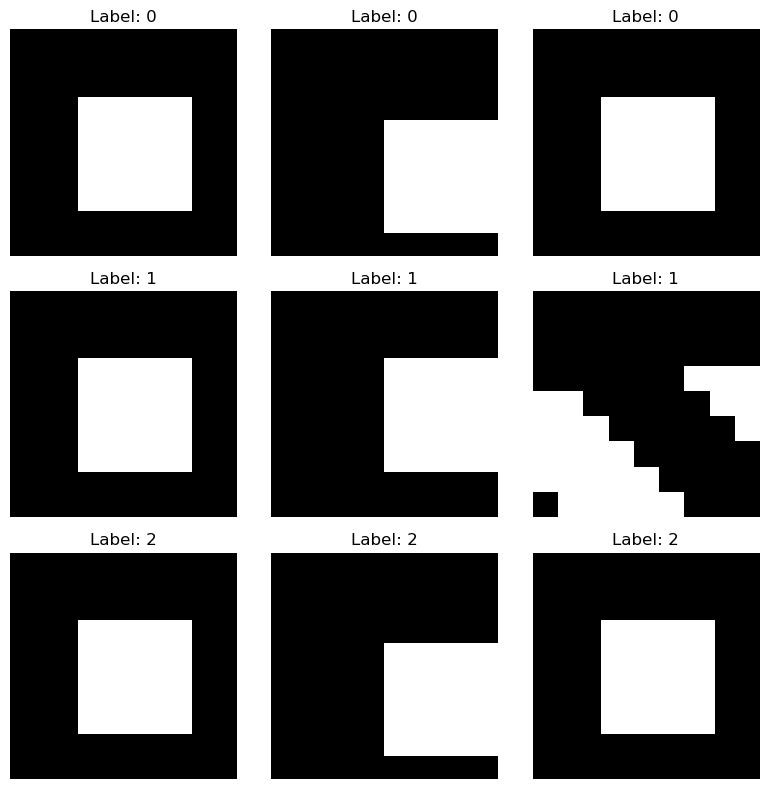

In [7]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Example image: 2D array
def generate_example_image(size=(10, 10)):
    # Generate a simple "digit" or object in an image (e.g., a 5x5 square)
    image = np.zeros(size)
    image[3:8, 3:8] = 1  # create a square in the center
    return image

# Translate (shift) image
def translate_image(image, shift_x, shift_y):
    # Roll the image for translation
    return np.roll(image, shift=(shift_x, shift_y), axis=(0, 1))

# Scale (resize) image
def scale_image(image, scale_factor):
    # Simple scaling by resizing
    new_size = int(image.shape[0] * scale_factor), int(image.shape[1] * scale_factor)
    scaled_image = np.array(image)
    scaled_image = np.resize(scaled_image, new_size)
    return scaled_image

def augment_data(X_train, T_train):
    augmented_X = []
    augmented_T = []

    for i in range(len(X_train)):
        # Original example
        augmented_X.append(X_train[i])
        augmented_T.append(T_train[i])

        # Apply translation (shift the image)
        translation_x = random.randint(-2, 2)  # horizontal shift
        translation_y = random.randint(-2, 2)  # vertical shift
        shifted_image = translate_image(X_train[i], translation_x, translation_y)
        augmented_X.append(shifted_image)
        augmented_T.append(T_train[i])

        # Apply scaling
        scale_factor = random.uniform(0.8, 1.2)  # scale factor
        scaled_image = scale_image(X_train[i], scale_factor)
        augmented_X.append(scaled_image)
        augmented_T.append(T_train[i])

    return np.array(augmented_X), np.array(augmented_T)

# Example: Create a simple dataset of images
X_train = np.array([generate_example_image() for _ in range(5)])  # 5 example images
T_train = np.array([0, 1, 2, 3, 4])  # corresponding labels

# Augment the training data
X_train_augmented, T_train_augmented = augment_data(X_train, T_train)

# Plot original and augmented images
plt.figure(figsize=(8, 8))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_train_augmented[i], cmap='gray')
    plt.title(f"Label: {T_train_augmented[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


In [ ]:
import random
import math

# Sigmoid function and its derivative
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Manual matrix operations
def matmul(A, B):
    """ Matrix multiplication for two matrices A and B """
    result = [[sum(a * b for a, b in zip(A_row, B_col)) for B_col in zip(*B)] for A_row in A]
    return result

def add_bias(matrix, bias):
    """ Add bias to each row of the matrix """
    return [[x + b for x, b in zip(row, bias)] for row in matrix]

def transpose(matrix):
    """ Transpose a matrix """
    return list(zip(*matrix))

def matmul_elementwise(A, B):
    """ Element-wise multiplication of two matrices of the same size """
    return [[a * b for a, b in zip(A_row, B_row)] for A_row, B_row in zip(A, B)]

# Neural Network Class
class SimpleNN:
    def __init__(self, input_size, hidden_size, output_size):
        # Initialize weights and biases with small random values
        self.weights1 = [[random.random() for _ in range(hidden_size)] for _ in range(input_size)]
        self.weights2 = [[random.random() for _ in range(output_size)] for _ in range(hidden_size)]
        self.bias1 = [random.random() for _ in range(hidden_size)]
        self.bias2 = [random.random() for _ in range(output_size)]

    def forward(self, X):
        # Forward pass through the network
        self.z1 = matmul(X, transpose(self.weights1))
        self.a1 = [sigmoid(x + b) for x, b in zip(self.z1[0], self.bias1)]  # Apply sigmoid on hidden layer
        self.z2 = matmul(self.a1, transpose(self.weights2))
        self.a2 = [sigmoid(x + b) for x, b in zip(self.z2[0], self.bias2)]  # Apply sigmoid on output layer
        return self.a2

    def backward(self, X, y, learning_rate=0.01):
        # Backpropagation to compute gradients and update weights
        output_error = [o - t for o, t in zip(self.a2[0], y)]  # error at output layer
        d_output = matmul_elementwise([[sigmoid_derivative(o) for o in self.a2[0]]], [output_error])

        hidden_error = matmul(d_output, self.weights2)
        d_hidden = matmul_elementwise([[sigmoid_derivative(h) for h in self.a1]], hidden_error)

        # Update weights and biases using gradient descent
        self.weights2 = matmul(self.transpose(self.a1), d_output)
        self.bias2 = [sum(d) * learning_rate for d in d_output]

        self.weights1 = matmul(self.transpose(X), d_hidden)
        self.bias1 = [sum(d) * learning_rate for d in d_hidden]

    def train(self, X_train, y_train, epochs=1000, learning_rate=0.01):
        for epoch in range(epochs):
            self.forward(X_train)  # forward pass
            self.backward(X_train, y_train, learning_rate)  # backward pass

            # Optionally print loss for tracking
            if epoch % 100 == 0:
                loss = sum([(o - t) ** 2 for o, t in zip(self.a2[0], y_train)]) / len(y_train)
                print(f"Epoch {epoch}/{epochs}, Loss: {loss}")

    def predict(self, X):
        return self.forward(X)


# Example training and testing
input_size = 10  # Number of input features (e.g., flattened image size)
hidden_size = 5  # Number of neurons in the hidden layer
output_size = 1  # Output size (e.g., one output per class)

# Create some dummy data
X_train = [[random.random() for _ in range(input_size)] for _ in range(10)]  # 10 examples, each with 10 features
y_train = [[random.random()] for _ in range(10)]  # 10 target values

# Create neural network model
model = SimpleNN(input_size, hidden_size, output_size)

# Train the network
model.train(X_train, y_train, epochs=1000, learning_rate=0.01)

# Make predictions
predictions = model.predict(X_train)

# Display the predictions
print(predictions)


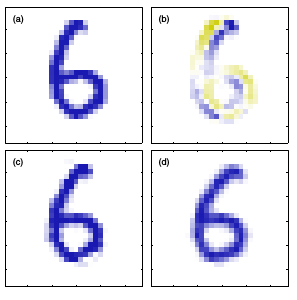

Fig.16 Illustration showing (a) the original image x of a hand- written digit, (b) the tangent vector τ corresponding to an inﬁnitesimal clockwise rotation, (c) the result of adding a small contribution from the tangent vector to the original image giving x + τ with = 15 degrees, and (d) the true image rotated for comparison.

##  Tangent Propagation

In pattern recognition, **regularization** techniques are used to encourage the model to be **invariant** to transformations of the input. One such technique is **tangent propagation**, which helps the model learn invariances like translation or rotation. 

### Concept

Consider the effect of a transformation on a particular input vector $ \mathbf{x}_n $. If the transformation is continuous (such as translation or rotation), the transformed pattern will sweep out a manifold $ \mathcal{M} $ within the input space. For simplicity, assume that the transformation is governed by a single parameter $ \xi $, for example, a **rotation angle**.

In this case, the subspace $ \mathcal{M} $ swept out by $ \mathbf{x}_n $ will be one-dimensional, and will be parameterized by $ \xi $. The transformation applied to $ \mathbf{x}_n $ will result in a vector $ \mathbf{s}(\mathbf{x}_n, \xi) $, where:

$$
\mathbf{s}(\mathbf{x}_n, 0) = \mathbf{x}_n
$$

The tangent to the curve $ \mathcal{M} $ at point $ \mathbf{x}_n $ can be approximated by the **directional derivative**:

$$
\tau_n = \frac{\partial \mathbf{s}(\mathbf{x}_n, \xi)}{\partial \xi} \bigg|_{\xi = 0}
$$

This **tangent vector** $ \tau_n $ describes the local change in the input vector $ \mathbf{x}_n $ as a result of a small change in the transformation parameter $ \xi $.

### Effect on Output

Under a transformation of the input vector, the output vector of the network will, in general, change. The derivative of output $ y_k $ with respect to $ \xi $ is given by:

$$
\frac{\partial y_k}{\partial \xi} = \sum_{i=1}^{D} J_{ki} \tau_i
$$

where $ J_{ki} $ is the $ (k,i) $-th element of the **Jacobian matrix** $ \mathbf{J} $, which represents the change in the output with respect to the change in the input.

### Regularization Function

The idea is to modify the error function $ E $ by adding a regularization term $ \Omega $ that encourages local invariance in the neighborhood of the data points:

$$
E_{\text{total}} = E + \lambda \Omega
$$

where $ \lambda $ is a regularization coefficient. The regularization term is:

$$
\Omega = \frac{1}{2} \sum_{n=1}^{N} \sum_{k=1}^{K} \sum_{i=1}^{D} J_{nki} \tau_{ni}^2
$$

Here:
- $ N $ is the number of training samples.
- $ K $ is the number of output units.
- $ D $ is the dimensionality of the input space.
- $ \tau_{ni} $ is the tangent vector corresponding to input $ \mathbf{x}_n $.

The regularization function $ \Omega $ will be zero when the network mapping is invariant under the transformation in the neighborhood of each input vector $ \mathbf{x}_n $. By minimizing the total error function $ E_{\text{total}} $, the network learns to be invariant to the transformations of the input data.

### Practical Implementation

In practice, the tangent vector $ \tau_n $ can be approximated using **finite differences**. The idea is to subtract the original vector $ \mathbf{x}_n $ from the corresponding vector after the transformation, and then divide by a small value of $ \xi $:

$$
\tau_n = \frac{\mathbf{s}(\mathbf{x}_n, \xi) - \mathbf{x}_n}{\xi}
$$

This method approximates the **directional derivative** by taking the difference between the original and transformed vectors, scaled by the parameter $ \xi $.

### Visual Example

The following illustrates how the tangent vector $ \tau_n $ corresponds to an infinitesimal clockwise rotation:

- **(a)** Original image $ \mathbf{x} $ of a handwritten digit.
- **(b)** Tangent vector $ \tau $ corresponding to a small clockwise rotation.
- **(c)** The result of adding a small contribution from the tangent vector to the original image, giving $ \mathbf{x} + \tau $ with $ \xi = 15^\circ $.
- **(d)** The true image rotated for comparison.

This illustration shows how the tangent vector can be used to modify the input and create an approximation of the transformed input.

### Summary

Tangent propagation is a powerful regularization technique that encourages the model to be invariant to transformations of the input. It does this by adding a regularization term to the error function, which penalizes changes in the output when the input is transformed. By learning the invariance properties, the model can generalize better, especially when limited training data is available for transformed inputs.


In [10]:
import random

# Define the sigmoid function and its derivative
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Define a simple 2-layer neural network
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        # Initialize weights with small random values
        self.weights1 = [[random.random() for _ in range(input_size)] for _ in range(hidden_size)]
        self.weights2 = [[random.random() for _ in range(hidden_size)] for _ in range(output_size)]
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size

    def forward(self, X):
        # Forward pass for the hidden layer
        self.hidden = [sum(X[i] * self.weights1[j][i] for i in range(self.input_size)) for j in range(self.hidden_size)]
        self.hidden = [sigmoid(h) for h in self.hidden]
        
        # Add bias term to the hidden layer outputs
        self.hidden = [1] + self.hidden  # Add a bias of 1

        # Forward pass for the output layer
        self.output = [sum(self.hidden[j] * self.weights2[k][j] for j in range(self.hidden_size)) for k in range(self.output_size)]
        self.output = [sigmoid(o) for o in self.output]

        return self.output

    def compute_jacobian(self, X):
        # Calculate the Jacobian matrix J
        jacobian = []
        for i in range(self.output_size):
            row = []
            for j in range(self.hidden_size):
                # Derivative of the output w.r.t. the hidden unit (using sigmoid derivative)
                row.append(self.weights2[i][j] * sigmoid_derivative(self.output[i]) * self.hidden[j])
            jacobian.append(row)
        return jacobian

    def tangent_vector(self, X, epsilon=0.01):
        # Compute tangent vector using finite differences (approximates the derivative)
        original_output = self.forward(X)
        X_prime = [x + epsilon for x in X]  # Apply small perturbation to input
        perturbed_output = self.forward(X_prime)

        tangent_vec = [perturbed_output[i] - original_output[i] for i in range(self.output_size)]
        return tangent_vec

    def regularization_term(self, X, lambda_reg=0.1):
        # Compute the regularization term Omega using the tangent vectors
        jacobian = self.compute_jacobian(X)
        tangent_vec = self.tangent_vector(X)

        reg_term = 0
        for i in range(self.output_size):
            for j in range(self.hidden_size):
                reg_term += (jacobian[i][j] * tangent_vec[i])**2
        reg_term *= lambda_reg / 2
        return reg_term

    def train(self, X_train, y_train, epochs, learning_rate, lambda_reg):
        for epoch in range(epochs):
            # Training loop
            total_error = 0
            for X, y in zip(X_train, y_train):
                # Forward pass
                self.forward(X)

                # Compute the error (Mean Squared Error)
                error = sum((self.output[i] - y[i])**2 for i in range(self.output_size))
                total_error += error

                # Backpropagation (simplified for illustration)
                # Compute gradient for weights and update weights here
                # This is a simplified example; you would need to implement full backprop here.

                # Add regularization to the error function
                total_error += self.regularization_term(X, lambda_reg)

            print(f'Epoch {epoch + 1}/{epochs}, Total Error: {total_error}')

# Example usage
input_size = 3  # Example input size
hidden_size = 4  # Example hidden layer size
output_size = 2  # Example output size

# Create training data (example)
X_train = [
    [0.1, 0.2, 0.3],
    [0.4, 0.5, 0.6],
    [0.7, 0.8, 0.9],
]
y_train = [
    [0, 1],
    [1, 0],
    [0, 1],
]

# Initialize and train the neural network
nn = NeuralNetwork(input_size, hidden_size, output_size)
nn.train(X_train, y_train, epochs=100, learning_rate=0.01, lambda_reg=0.1)


Epoch 1/100, Total Error: 1.8706161448592484
Epoch 2/100, Total Error: 1.8706161448592484
Epoch 3/100, Total Error: 1.8706161448592484
Epoch 4/100, Total Error: 1.8706161448592484
Epoch 5/100, Total Error: 1.8706161448592484
Epoch 6/100, Total Error: 1.8706161448592484
Epoch 7/100, Total Error: 1.8706161448592484
Epoch 8/100, Total Error: 1.8706161448592484
Epoch 9/100, Total Error: 1.8706161448592484
Epoch 10/100, Total Error: 1.8706161448592484
Epoch 11/100, Total Error: 1.8706161448592484
Epoch 12/100, Total Error: 1.8706161448592484
Epoch 13/100, Total Error: 1.8706161448592484
Epoch 14/100, Total Error: 1.8706161448592484
Epoch 15/100, Total Error: 1.8706161448592484
Epoch 16/100, Total Error: 1.8706161448592484
Epoch 17/100, Total Error: 1.8706161448592484
Epoch 18/100, Total Error: 1.8706161448592484
Epoch 19/100, Total Error: 1.8706161448592484
Epoch 20/100, Total Error: 1.8706161448592484
Epoch 21/100, Total Error: 1.8706161448592484
Epoch 22/100, Total Error: 1.87061614485924

### Training with Transformed Data

In this section, we explore the technique of **training with transformed data** to encourage invariance to input transformations. This method is connected to **tangent propagation** (Bishop, 1995b; Leen, 1995). Here's the detailed explanation:

#### Error Function for Transformed Data

Given an input vector $ x $, consider a transformation governed by a parameter $ \xi $, described by the function $ s(x, \xi) $, where $ s(x, 0) = x $. The error function for untransformed inputs can be written as:

$$
E = \int \frac{1}{2} \left( y(x) - t \right)^2 p(t|x) p(x) \, dx \, dt
$$

Now, if we perturb the input data by a transformation governed by a distribution $ p(\xi) $ with zero mean and small variance, the error function over the transformed data set can be written as:

$$
E_{\xi} = \int \frac{1}{2} \left( y(s(x, \xi)) - t \right)^2 p(t|x) p(x) p(\xi) \, dx \, dt \, d\xi
$$

#### Taylor Expansion of the Transformation

For small transformations, we can expand the transformation function as a Taylor series:

$$
s(x, \xi) = x + \xi \tau + \frac{\xi^2}{2} \tau_2 + O(\xi^3)
$$

where $ \tau $ is the first derivative (tangent vector), and $ \tau_2 $ is the second derivative of $ s(x, \xi) $ evaluated at $ \xi = 0 $.

Expanding the model function $ y(s(x, \xi)) $ yields:

$$
y(s(x, \xi)) = y(x) + \xi \tau^T \nabla y(x) + \frac{\xi^2}{2} \tau^T \nabla \nabla y(x) \tau + O(\xi^3)
$$

Substituting this expansion into the error function, we have:

$$
E_{\xi} = \int \frac{1}{2} \left( y(x) - t \right)^2 p(t|x) p(x) \, dx \, dt + E[\xi] \left( y(x) - t \right) \tau^T \nabla y(x) p(t|x) p(x) \, dx \, dt + O(\xi^2)
$$

Since $ E[\xi] = 0 $ and $ E[\xi^2] = \lambda $, the error function simplifies to:

$$
E_{\xi} = E + \lambda \Omega E
$$

where $ \Omega $ is the regularization term that penalizes the change in the output due to small transformations of the input. The regularization term $ \Omega $ takes the following form:

$$
\Omega = \frac{1}{2} \int \left( y(x) - E[t|x] \right) \tau^T \nabla y(x) + \tau^T \nabla \nabla y(x) \tau + \tau^T \nabla y(x) p(x) \, dx
$$

Simplifying further, the regularization term becomes:

$$
\Omega = \frac{1}{2} \int \tau^T \nabla y(x) p(x) \, dx
$$

This is equivalent to the **tangent propagation regularizer** introduced earlier:

$$
\Omega = \frac{1}{2} \int \left| \nabla y(x) \right|^2 p(x) \, dx
$$

#### Tikhonov Regularization

In the special case where the transformation is the addition of random noise $ x \to x + \xi $, the regularizer becomes:

$$
\Omega = \frac{1}{2} \int \left| \nabla y(x) \right|^2 p(x) \, dx
$$

This is known as **Tikhonov regularization**, and it is related to adding random noise to the input. Tikhonov regularization is commonly used to improve generalization in neural networks.

#### Conclusion

By adding the regularization term $ \Omega $, we penalize changes in the output due to small transformations in the input. This encourages the model to be invariant to such transformations, thus improving its generalization ability.


In [11]:
### Define a simple neural network model.
### Apply transformations to the input data (in this case, adding noise).
### Compute the regularization term.
### Update the weights using gradient descent.

import random
import math

# Sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

# Initialize a neural network
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        
        # Random initialization of weights
        self.weights1 = [[random.random() for _ in range(input_size)] for _ in range(hidden_size)]
        self.weights2 = [[random.random() for _ in range(hidden_size)] for _ in range(output_size)]
        
    def forward(self, X):
        self.hidden_input = [sum(X[i] * self.weights1[j][i] for i in range(self.input_size)) for j in range(self.hidden_size)]
        self.hidden_output = [sigmoid(x) for x in self.hidden_input]
        
        self.output_input = [sum(self.hidden_output[i] * self.weights2[j][i] for i in range(self.hidden_size)) for j in range(self.output_size)]
        self.output_output = [sigmoid(x) for x in self.output_input]
        
        return self.output_output

    def backward(self, X, T, learning_rate):
        # Compute the gradients of weights (backpropagation)
        output_errors = [self.output_output[i] - T[i] for i in range(self.output_size)]
        output_gradients = [output_errors[i] * sigmoid_derivative(self.output_input[i]) for i in range(self.output_size)]

        hidden_errors = [sum(self.weights2[j][i] * output_gradients[j] for j in range(self.output_size)) for i in range(self.hidden_size)]
        hidden_gradients = [hidden_errors[i] * sigmoid_derivative(self.hidden_input[i]) for i in range(self.hidden_size)]
        
        # Update the weights using gradient descent
        for i in range(self.output_size):
            for j in range(self.hidden_size):
                self.weights2[i][j] -= learning_rate * output_gradients[i] * self.hidden_output[j]

        for i in range(self.hidden_size):
            for j in range(self.input_size):
                self.weights1[i][j] -= learning_rate * hidden_gradients[i] * X[j]
                
    def compute_tikhonov_regularization(self, X):
        # Compute the regularization term (Tikhonov regularization)
        regularization = 0
        for x in X:
            output = self.forward(x)
            for i in range(self.hidden_size):
                for j in range(self.input_size):
                    regularization += (self.weights1[i][j] ** 2)
            for i in range(self.output_size):
                for j in range(self.hidden_size):
                    regularization += (self.weights2[i][j] ** 2)
        
        return regularization

# Training the neural network
def train_neural_network(X_train, T_train, input_size, hidden_size, output_size, epochs, learning_rate, lambda_reg):
    nn = NeuralNetwork(input_size, hidden_size, output_size)
    
    for epoch in range(epochs):
        for i in range(len(X_train)):
            X = X_train[i]
            T = T_train[i]
            
            # Add random noise to the input to simulate transformations
            noise = [random.gauss(0, 0.1) for _ in range(len(X))]
            X_transformed = [X[j] + noise[j] for j in range(len(X))]

            # Perform forward pass and backward pass
            nn.forward(X_transformed)
            nn.backward(X_transformed, T, learning_rate)

        # Compute regularization term
        regularization = nn.compute_tikhonov_regularization(X_train)

        # Include regularization in the total error
        print(f"Epoch {epoch+1}/{epochs}, Regularization Term: {regularization}")
    
    return nn

# Example usage
# Input data (X_train) and target labels (T_train) - small example for demonstration
X_train = [[0.1, 0.5, 0.8], [0.9, 0.4, 0.2], [0.3, 0.6, 0.7]]  # 3 samples, 3 features each
T_train = [[1], [0], [1]]  # 3 samples, 1 output each (binary classification)

# Train the network with 2 hidden neurons, 3 input features, and 1 output neuron
trained_nn = train_neural_network(X_train, T_train, input_size=3, hidden_size=2, output_size=1, epochs=1000, learning_rate=0.01, lambda_reg=0.1)


Epoch 1/1000, Regularization Term: 6.5421321492185065
Epoch 2/1000, Regularization Term: 6.54277783855075
Epoch 3/1000, Regularization Term: 6.543335477604797
Epoch 4/1000, Regularization Term: 6.5444194370256215
Epoch 5/1000, Regularization Term: 6.544992211614606
Epoch 6/1000, Regularization Term: 6.545909569294689
Epoch 7/1000, Regularization Term: 6.54594740077364
Epoch 8/1000, Regularization Term: 6.547151883910556
Epoch 9/1000, Regularization Term: 6.547686164405918
Epoch 10/1000, Regularization Term: 6.547769783174272
Epoch 11/1000, Regularization Term: 6.548811532173772
Epoch 12/1000, Regularization Term: 6.5491864344177735
Epoch 13/1000, Regularization Term: 6.549723455296615
Epoch 14/1000, Regularization Term: 6.5506674756421095
Epoch 15/1000, Regularization Term: 6.550886349495234
Epoch 16/1000, Regularization Term: 6.5518728102363815
Epoch 17/1000, Regularization Term: 6.552484744098325
Epoch 18/1000, Regularization Term: 6.553172494936494
Epoch 19/1000, Regularization Term

Epoch 748/1000, Regularization Term: 6.901616060524813
Epoch 749/1000, Regularization Term: 6.901910442984765
Epoch 750/1000, Regularization Term: 6.901851695708952
Epoch 751/1000, Regularization Term: 6.901812691445983
Epoch 752/1000, Regularization Term: 6.901792969798928
Epoch 753/1000, Regularization Term: 6.902467593698037
Epoch 754/1000, Regularization Term: 6.9033527782888635
Epoch 755/1000, Regularization Term: 6.904157634374311
Epoch 756/1000, Regularization Term: 6.904745967750374
Epoch 757/1000, Regularization Term: 6.904945210876693
Epoch 758/1000, Regularization Term: 6.905276795609703
Epoch 759/1000, Regularization Term: 6.905862175839115
Epoch 760/1000, Regularization Term: 6.906564063396193
Epoch 761/1000, Regularization Term: 6.907090299852263
Epoch 762/1000, Regularization Term: 6.906950740848721
Epoch 763/1000, Regularization Term: 6.9075775653875775
Epoch 764/1000, Regularization Term: 6.907442125757581
Epoch 765/1000, Regularization Term: 6.9075960363877815
Epoch 7